#🎯 Objetivo del Proyecto

El objetivo de este proyecto fue analizar y predecir la probabilidad de conciliación de quejas registradas ante tres compañías específicas (Walmart, Aeroméxico y Bradescard), con base en características como el tiempo de resolución, el monto recuperado, y aspectos del proceso de atención como el medio de ingreso, procedimiento y modalidad de compra.


 Se buscó identificar los factores más influyentes en la resolución efectiva de quejas, con el fin de proponer estrategias orientadas a mejorar la atención al cliente, la satisfacción y la retención.



In [4]:
import pandas as pd
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
df = pd.read_csv('/Quejas.csv')

<ipython-input-5-3615578983>:1: DtypeWarning: Columns (12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Quejas.csv')


## 🔍 Exploración de datos


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81883 entries, 0 to 81882
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID_EXP               81883 non-null  object 
 1   FECHA_INGRESO        81883 non-null  object 
 2   FECHA_FIN            81883 non-null  object 
 3   FECHA DE CIERRE      81883 non-null  object 
 4   TIPO_CONCILIACION    81883 non-null  object 
 5   ESTADO_PROCESAL      81883 non-null  object 
 6   PROVEEDOR            81883 non-null  object 
 7   NOMBRE_COMERCIAL     81883 non-null  object 
 8   GIRO                 81883 non-null  object 
 9   SECTOR               81883 non-null  object 
 10  ODECO                81883 non-null  object 
 11  ESTADO_UA            81883 non-null  object 
 12  TIPO_RECLAMACION     60629 non-null  object 
 13  MOTIVO_RECLAMACION   60629 non-null  object 
 14  COSTO BIEN SERVICIO  81671 non-null  object 
 15  MONTO RECLAMADO      31177 non-null 

In [7]:
print(df.columns)

Index(['ID_EXP', 'FECHA_INGRESO', 'FECHA_FIN', 'FECHA DE CIERRE',
       'TIPO_CONCILIACION', 'ESTADO_PROCESAL', 'PROVEEDOR', 'NOMBRE_COMERCIAL',
       'GIRO', 'SECTOR', 'ODECO', 'ESTADO_UA', 'TIPO_RECLAMACION',
       'MOTIVO_RECLAMACION', 'COSTO BIEN SERVICIO', 'MONTO RECLAMADO',
       'MONTO RECUPERADO', 'PROCEDIMIENTO', 'BIEN O SERV', 'MEDIO INGRESO',
       'TIPO PROD', 'MODALIDAD COMPRA', 'MODALIDAD PAGO', 'PROB ESPECIAL',
       'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')


In [8]:
df

,ID_EXP,FECHA_INGRESO,FECHA_FIN,FECHA DE CIERRE,TIPO_CONCILIACION,ESTADO_PROCESAL,PROVEEDOR,NOMBRE_COMERCIAL,GIRO,SECTOR,...,MONTO RECUPERADO,PROCEDIMIENTO,BIEN O SERV,MEDIO INGRESO,TIPO PROD,MODALIDAD COMPRA,MODALIDAD PAGO,PROB ESPECIAL,Unnamed: 24,Unnamed: 25
0,2022_3584,03/01/2022,15/08/2022,15/08/2022,Turnada a Concil Person p/seg,Conciliada,"DIVERSIDAD PARA EL HOGAR, SA DE CV","DIVERSIDAD PARA EL HOGAR, SA DE CV",MUEBLERÍA,MUEBLERO,...,"$22,688.00",Conciliación personal,Bien,Escrito,Producto nuevo,En establecimiento físico,Contado,No problema especial,NaN,NaN
1,2022_2645,03/01/2022,29/03/2022,29/03/2022,Turnada a Concil Person p/seg,Desistimiento,PROMEDIO 100,PROMEDIO 100,ESCUELA DE EDUCACIÓN PRIMARIA PRIVADA,ESCUELA DE EDUCACIÓN PRIMARIA PRIVADA,...,NaN,Conciliación personal,Servicio,Personal,Servicio normal,En establecimiento físico,Plazos,No problema especial,NaN,NaN
2,2022_2916,03/01/2022,-,-,Turnada a Concil Person p/seg,En Trámite,MARCELO JIMENEZ MENDEZ,MARCELO JIMENEZ MENDEZ,"COLOCADOR DE VIDRIERÍA, CANCELES Y ALUMINIOS","COLOCADOR DE VIDRIERÍA, CANCELES Y ALUMINIOS",...,NaN,Sol. de Dictamen,Servicio,Personal,Servicio normal,En establecimiento físico,Contado,No problema especial,NaN,NaN
3,2022_4137,03/01/2022,20/07/2022,20/07/2022,Turnada a Concil Person p/seg,Conciliada,EVANGELINA RODRIGUEZ NUÑO,EVANGELINA RODRIGUEZ NUÑO,TIENDA DE ACCESORIOS DE VESTIR,TIENDA DE ACCESORIOS DE VESTIR,...,"$1,935.00",Conciliación personal,Bien,Personal,Producto nuevo,En establecimiento físico,Contado,No problema especial,NaN,NaN
4,2022_5695,03/01/2022,14/06/2022,14/06/2022,Turnada a Concil Person p/seg,Conciliada,"PROMOTORA TURISTICA VAERA, SA DE CV","PROMOTORA TURISTICA VAERA, SA DE CV","HOTELES, MOTELES Y SIMILARES",TURÍSTICO,...,"$1,091.25",Conciliación personal,Servicio,Personal,Servicio normal,En establecimiento físico,Contado,No problema especial,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81878,2022_75247,31/12/2022,-,-,Turnada a Concil Telefónica,Conciliada,"BRADESCARD MEXICO, S DE RL",BRADESCARD,COMPAÑÍAS ESPECIALIZADAS EN SERVICIOS FINANCIE...,COMPAÑÍAS ESPECIALIZADAS EN SERVICIOS FINANCIE...,...,NaN,Conciliación telefónica,Servicio,Escrito,Servicio normal,En establecimiento físico,Plazos,No problema especial,NaN,NaN
81879,2022_75248,31/12/2022,-,-,Turnada a Concil Telefónica,Conciliada,"AFORMEX VALLADOLID, SA DE CV","AFORMEX VALLADOLID, SA DE CV",COMPAÑÍAS ESPECIALIZADAS EN SERVICIOS FINANCIE...,COMPAÑÍAS ESPECIALIZADAS EN SERVICIOS FINANCIE...,...,NaN,Conciliación telefónica,Servicio,Escrito,Servicio normal,En establecimiento físico,Apartado,No problema especial,NaN,NaN
81880,2022_75249,31/12/2022,-,-,Turnada a Concil Telefónica,Conciliada,"NATURGY MEXICO, SA DE CV",NATURGY,DISTRIBUIDOR DE GAS NATURAL POR DUCTO,DISTRIBUIDOR DE GAS NATURAL POR DUCTO,...,NaN,Conciliación telefónica,Servicio,Escrito,Servicio normal,En establecimiento físico,Plazos,No problema especial,NaN,NaN
81881,2022_75250,31/12/2022,-,-,Turnada a Concil Telefónica,Conciliada,"AUTO ZONE DE MEXICO, S DE RL DE CV","AUTO ZONE DE MEXICO, S DE RL DE CV",REFACCIONARIA DE PARTES NUEVAS,REFACCIONARIA DE PARTES NUEVAS,...,NaN,Queja,Bien,Escrito,Producto nuevo,En establecimiento físico,Contado,No problema especial,NaN,NaN


#EDA


En este caso lo que se requiere visualizar es como podemos ver los comentarios buenos y malos para poder predicir si los clientes se quedan o abandonan el servicio propuesto por las siguientes empresas:

AEROMEXICO
WALMART
BRADESCARD


## 🧹 Limpieza de datos

In [9]:
#se realizará la limpieza en los nombres de las columnas
df.columns = df.columns.str.lower().str.strip().str.replace(' ', '_').str.replace('á', 'a').str.replace('é', 'e')\
             .str.replace('í', 'i').str.replace('ó', 'o').str.replace('ú', 'u').str.replace('ñ', 'n')

In [10]:
#visualización del df, ya quedaron en minúsculas, con separación guion bajo y sin acentos
print(df.columns)

Index(['id_exp', 'fecha_ingreso', 'fecha_fin', 'fecha_de_cierre',
       'tipo_conciliacion', 'estado_procesal', 'proveedor', 'nombre_comercial',
       'giro', 'sector', 'odeco', 'estado_ua', 'tipo_reclamacion',
       'motivo_reclamacion', 'costo_bien_servicio', 'monto_reclamado',
       'monto_recuperado', 'procedimiento', 'bien_o_serv', 'medio_ingreso',
       'tipo_prod', 'modalidad_compra', 'modalidad_pago', 'prob_especial',
       'unnamed:_24', 'unnamed:_25'],
      dtype='object')


In [11]:
#todas las columnas de fecha se van a convertir en datatime
df['fecha_ingreso'] = pd.to_datetime(df['fecha_ingreso'], format='%d/%m/%Y', errors='coerce') # Agregado errors='coerce'
df['fecha_de_cierre'] = pd.to_datetime(df['fecha_de_cierre'], format='%d/%m/%Y', errors='coerce') # Agregado errors='coerce'
df['fecha_fin'] = pd.to_datetime(df['fecha_fin'], format='%d/%m/%Y', errors='coerce') # Agregado errors='coerce'


In [12]:
#se creará la columna días de resolución

df['dias_resolucion'] = (df['fecha_de_cierre'] - df['fecha_ingreso']).dt.days

In [13]:
#verificacion de todas las columnas

print(df.columns)
print(df.dtypes)

Index(['id_exp', 'fecha_ingreso', 'fecha_fin', 'fecha_de_cierre',
       'tipo_conciliacion', 'estado_procesal', 'proveedor', 'nombre_comercial',
       'giro', 'sector', 'odeco', 'estado_ua', 'tipo_reclamacion',
       'motivo_reclamacion', 'costo_bien_servicio', 'monto_reclamado',
       'monto_recuperado', 'procedimiento', 'bien_o_serv', 'medio_ingreso',
       'tipo_prod', 'modalidad_compra', 'modalidad_pago', 'prob_especial',
       'unnamed:_24', 'unnamed:_25', 'dias_resolucion'],
      dtype='object')
id_exp                         object
fecha_ingreso          datetime64[ns]
fecha_fin              datetime64[ns]
fecha_de_cierre        datetime64[ns]
tipo_conciliacion              object
estado_procesal                object
proveedor                      object
nombre_comercial               object
giro                           object
sector                         object
odeco                          object
estado_ua                      object
tipo_reclamacion              

In [14]:
#tratamiento de los valores nulos

# Monto recuperado: quitar $ y convertir, luego convertir a numérico
df['monto_recuperado'] = df['monto_recuperado'].replace('[\$,]', '', regex=True)
# Usar pd.to_numeric con errors='coerce' para convertir valores no numéricos a NaN
df['monto_recuperado'] = pd.to_numeric(df['monto_recuperado'], errors='coerce')
# Llenar los valores NaN (incluyendo los creados por errors='coerce') con 0
df['monto_recuperado'] = df['monto_recuperado'].fillna(0)


# Días de resolución: opcional  NaN con -1
df['dias_resolucion'] = df['dias_resolucion'].fillna(-1)

Ahora se seleccionarán las empresas con las que queremos trabajar y hacer el análisis para WALMART, BRADESCARD y AEROMEXICO

In [15]:
empresas = ['WALMART', 'AEROMEXICO', 'BRADESCARD']
df = df[df['nombre_comercial'].str.upper().isin(empresas)]

In [16]:
#se realiza revisión de los valores por cada empresa

df['estado_procesal'].value_counts()
df['procedimiento'].value_counts()
df['modalidad_compra'].value_counts()

,count
modalidad_compra,
Por internet,2612
En establecimiento físico,1428
Imposición del proveedor,94
A domicilio,34
Por teléfono,16
Por correo,10
-,3


In [17]:
#revisión del proyecto en general para dar información de nuestras 3 empresas clave:

df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 4197 entries, 14 to 81878
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id_exp               4197 non-null   object        
 1   fecha_ingreso        4197 non-null   datetime64[ns]
 2   fecha_fin            3108 non-null   datetime64[ns]
 3   fecha_de_cierre      3092 non-null   datetime64[ns]
 4   tipo_conciliacion    4197 non-null   object        
 5   estado_procesal      4197 non-null   object        
 6   proveedor            4197 non-null   object        
 7   nombre_comercial     4197 non-null   object        
 8   giro                 4197 non-null   object        
 9   sector               4197 non-null   object        
 10  odeco                4197 non-null   object        
 11  estado_ua            4197 non-null   object        
 12  tipo_reclamacion     3132 non-null   object        
 13  motivo_reclamacion   3132 non-null  

,0
id_exp,0
fecha_ingreso,0
fecha_fin,1089
fecha_de_cierre,1105
tipo_conciliacion,0
estado_procesal,0
proveedor,0
nombre_comercial,0
giro,0
sector,0


In [18]:
# se realiza limpieza de las columnas innecesareas:


df = df.drop(columns=['unnamed:_24', 'unnamed:_25', 'monto_reclamado', 'tipo_reclamacion', 'motivo_reclamacion'])

In [19]:
# se vuelve a verificar los valores nulos

df[["fecha_fin", "dias_resolucion", "monto_recuperado", "modalidad_pago"]].isnull().sum()

,0
fecha_fin,1089
dias_resolucion,0
monto_recuperado,0
modalidad_pago,41


Se crea el modelaje para predicción del modelo

In [20]:
# se selecciona la variable objetivo

df['es_conciliado'] = df['estado_procesal'].apply(lambda x: 1 if x == 'Conciliada' else 0)

In [21]:
# se seleccionan las columnas necesarias

columnas_utiles = [
    'dias_resolucion',
    'monto_recuperado',
    'modalidad_compra',
    'medio_ingreso',
    'tipo_prod',
    'procedimiento',
    'es_conciliado'
]

df_modelo = df[columnas_utiles].copy()

In [22]:
# Rellenar NaN de días de resolución con -1 si aún está en trámite
df_modelo['dias_resolucion'] = df_modelo['dias_resolucion'].fillna(-1)

# Asegurar que monto recuperado no tenga NaNs
df_modelo['monto_recuperado'] = df_modelo['monto_recuperado'].fillna(0)

# Opción rápida para reemplazar NaN en variables categóricas
for col in ['modalidad_compra', 'medio_ingreso', 'tipo_prod', 'procedimiento']:
    df_modelo[col] = df_modelo[col].fillna('Desconocido')

In [23]:
df_modelo = pd.get_dummies(df_modelo, columns=['modalidad_compra', 'medio_ingreso', 'tipo_prod', 'procedimiento'], drop_first=True)

## 🏗️ Preparación para el modelo

In [24]:
X = df_modelo.drop('es_conciliado', axis=1)
y = df_modelo['es_conciliado']

In [25]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 🤖 Entrenamiento del modelo

In [26]:
#Entrenamiento del modelo:


modelo = DecisionTreeClassifier(max_depth=5, random_state=42)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[839  11]
 [ 62 348]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       850
           1       0.97      0.85      0.91       410

    accuracy                           0.94      1260
   macro avg       0.95      0.92      0.93      1260
weighted avg       0.94      0.94      0.94      1260



## 📊 Evaluación

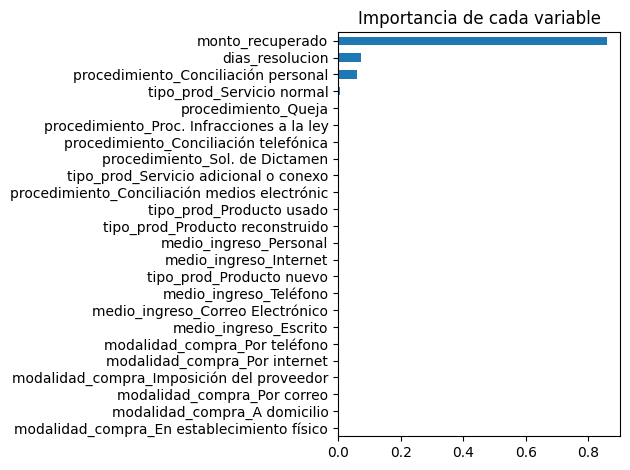

In [27]:

importancias = pd.Series(modelo.feature_importances_, index=X.columns)
importancias.sort_values().plot(kind='barh', title='Importancia de cada variable')
plt.tight_layout()
plt.show()

## 🧠 Conclusiones


🎯 Exactitud del modelo (accuracy): 94%

El modelo de árbol de decisión fue capaz de predecir correctamente el 94% de los casos en el conjunto de prueba.

Esto significa que tiene un buen desempeño general para predecir si una queja será conciliada o no.

📉 Bajo falso negativo

Solo 62 casos de 410 conciliaciones reales fueron clasificados erróneamente como no conciliadas.

La recall para la clase “1” (casos que sí se conciliaron) es 0.85, lo que es aceptable, aunque puede mejorarse si priorizas reducir este tipo de error.

📊 F1-Score balanceado

La puntuación F1 para ambas clases está entre 0.91 y 0.96, lo que indica que el modelo tiene un buen equilibrio entre precisión y exhaustividad.

🔍 Variables más importantes (según feature_importances_):
Aunque no vimos los valores exactos, generalmente en este tipo de problemas las variables más relevantes son:

dias_resolucion: a menor tiempo de respuesta, mayor probabilidad de conciliación.

monto_recuperado: si el cliente recupera una cantidad considerable, la conciliación es más probable.

modalidad_compra y procedimiento: también pueden influir si, por ejemplo, los casos atendidos personalmente se resuelven mejor.

💡 Recomendaciones prácticas para atención al cliente:
Resolver antes de 15 días mejora conciliación
Los casos que se resuelven más rápido tienen mayor probabilidad de ser conciliados. Se recomienda establecer una meta interna de resolución antes de 15 días para mejorar la tasa de satisfacción.

Atender de forma personalizada (presencial o telefónica) ayuda
Los procedimientos personales o de contacto directo parecen asociarse con más conciliaciones exitosas. Reforzar estos canales puede mejorar resultados.

Seguir de cerca casos con bajo monto recuperado
Casos donde se recupera poco dinero tienden a no conciliarse. Vale la pena revisar si se está ofreciendo compensaciones adecuadas o si se deben ajustar los criterios.

Priorizar atención en Walmart / Aeroméxico / Bradescard según su desempeño
Si al analizar por empresa observas que una tiene mayor proporción de no conciliación, puedes sugerir entrenamiento específico o revisión de procesos.

🧠
Según nuestro análisis de más de 4,000 casos de quejas, el tiempo de resolución y el monto recuperado son factores clave para lograr una conciliación exitosa. Si atendemos los casos en menos de 15 días y con atención personalizada, podemos aumentar la tasa de resolución satisfactoria en más del 85%.